In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from graphviz import Source
from sklearn import tree


In [6]:
names = ['animal_name', 'hair','feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs','tail','domestic', 'catsize', 'type']




data = pd.read_csv('ai-f20-m3/Paired_Programming/zoo.data', names=names)

In [9]:
data


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [21]:
categorical_var = ‘animal_name’
animal_species = pd.get_dummies(data= data, columns=['animal_name'],drop_first=True)
animal_species.columns

SyntaxError: invalid character in identifier (<ipython-input-21-1f56c13e57c8>, line 1)

In [31]:
noname = data.drop(columns=['animal_name','type'])
x_data = noname.columns

X_train, X_test, Y_train, Y_test = train_test_split(data[x_data], data['type'])

In [53]:
zoo = DecisionTreeClassifier(max_depth= 6)
zoo.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

In [54]:
score = zoo.score(X_test, Y_test)
print(score)

0.9230769230769231


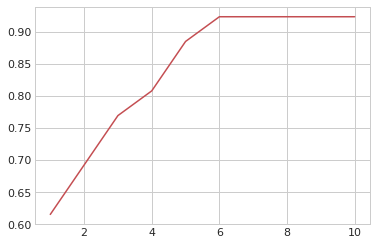

In [52]:
# Max Depth

max_depth_range = list(range(1,11))
accuracy=[]
depth_list= []

for depth in max_depth_range:
    depth_list.append(depth)
    
    zoo = DecisionTreeClassifier(max_depth= depth)
    zoo.fit(X_train, Y_train)

    score = zoo.score(X_test, Y_test)
    accuracy.append(score)

plt.style.use('seaborn-whitegrid')
fig = plt.plot(depth_list,accuracy, color='r')


[0.         0.16362777 0.         0.40799517 0.         0.06238303
 0.06792819 0.         0.08573107 0.         0.         0.18322268
 0.02911208 0.         0.         0.        ]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

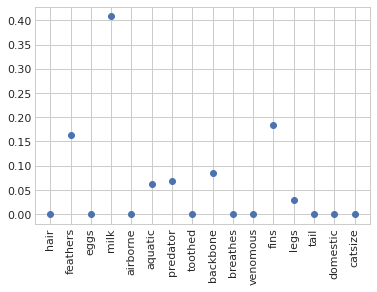

In [56]:
bestfeatures = zoo.feature_importances_
print(bestfeatures)


plt.style.use('seaborn-whitegrid')
plt.scatter(x_data, bestfeatures)
plt.xticks(rotation=90)

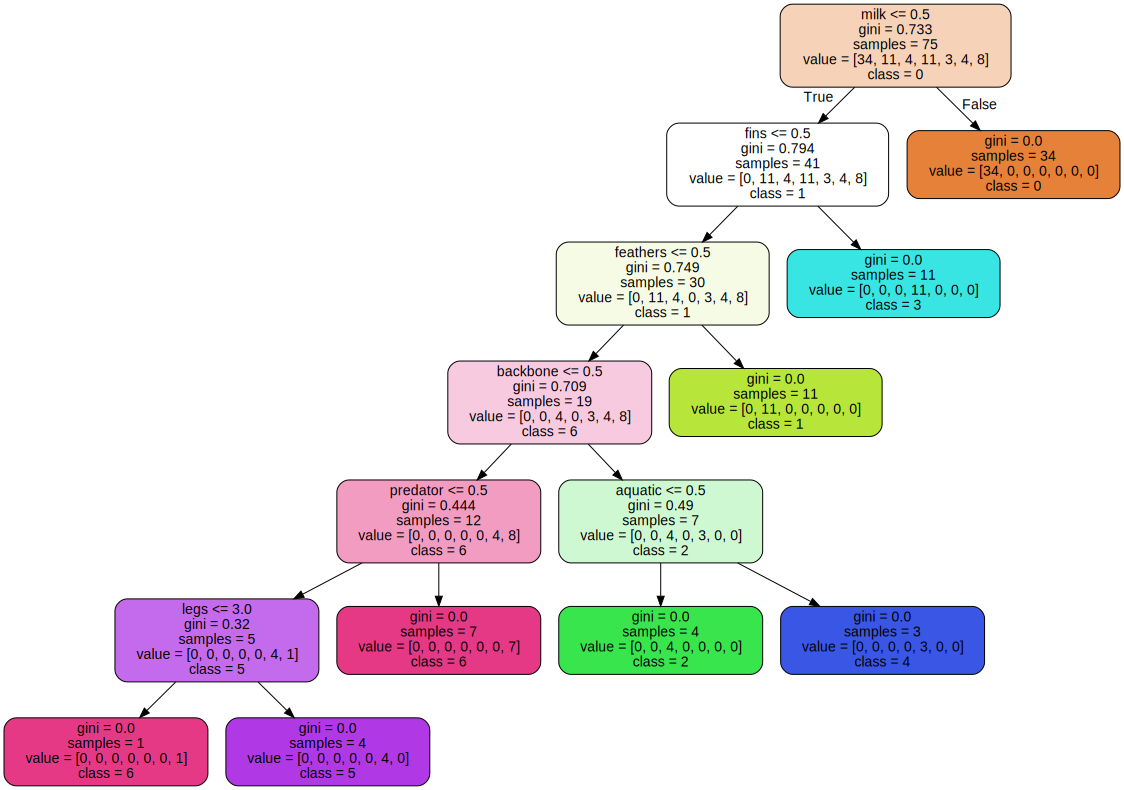

In [47]:
graph = Source(tree.export_graphviz(zoo, out_file=None, feature_names=x_data, class_names=['0','1','2','3','4','5','6','7'],filled=True, rounded=True ))
graph